In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from custom_bagging import CustomBaggingClassifier 
from custom_balanced_bagging import CustomImblearnBalancedBagging
from custom_xgboost import CustomXGBoost
from custom_decision_tree import CustomDecisionTree
from custom_random_forest import CustomRandomForest
from custom_lightgbm import CustomLightGBM
from custom_hist_gradient_boosting import CustomHGBoosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from custom_functions import handle_class_imbalance, split_data
from sklearn.model_selection import GridSearchCV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# Importing the dataset
file_path = 'P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v8.csv'
df = pd.read_csv(file_path)
dataset = df.copy()
dataset.head()

,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006_S1_,FROPCOM0006_S2_,FROPCOM0006_S3_,FROPCOM0006_S4_,FROPCOM0006_S5_,...,FROPCOM0004_SQ010_SQ002__100 mg,FROPCOM0004_SQ010_SQ002__20 mg,FROPCOM0004_SQ010_SQ002__nan,FROPCOM0004_SQ010_SQ003__0.5-0-0,FROPCOM0004_SQ010_SQ003__1-0-0,FROPCOM0004_SQ010_SQ003__1-0-1,FROPCOM0004_SQ010_SQ003__10-0-0,FROPCOM0004_SQ010_SQ003__nan,Frailty_Score,Frailty_State
0,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,1.0,...,0,0,1,0,0,0,0,1,7,0
1,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,4,1
2,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,9,0
3,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,7,0
4,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,8,0


In [6]:
estimator = HistGradientBoostingClassifier()
models = {
    'DecisionTree': CustomDecisionTree(),
    'XGBoost': CustomXGBoost(),
    'RandomForest': CustomRandomForest(),
    'LightGBM': CustomLightGBM(),
    'HistGradientBoosting' : CustomHGBoosting(), 
    'Bagging': CustomBaggingClassifier(estimator=estimator) ,
    'BalancedBagging': CustomImblearnBalancedBagging(estimator=estimator),
}


In [7]:
best_models = {}
metrics = {}

X_train, X_test, y_train, y_test = split_data(dataset)


for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_acc = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_prec = precision_score(y_train, y_train_pred, average='weighted')
    model_train_rec = recall_score(y_train, y_train_pred, average='weighted')

    # Test set performance
    model_test_acc = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_prec = precision_score(y_test, y_test_pred, average='weighted')
    model_test_rec = recall_score(y_test, y_test_pred, average='weighted')

    print(list(models.keys())[i])
    print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
    print('Training set accuracy: ', model_train_acc)
    print('Training set F1 score: ', model_train_f1)
    print('Training set precision: ', model_train_prec)
    print('Training set recall: ', model_train_rec)
    print('Training ROC AUC score: ', roc_auc_score(y_train, y_train_pred))

    print('_______________________________')

    print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
    print('Test set accuracy: ', model_test_acc)
    print('Test set F1 score: ', model_test_f1)
    print('Test set precision: ', model_test_prec)
    print('Test set recall: ', model_test_rec)
    print('Test ROC AUC score: ', roc_auc_score(y_test, y_test_pred))

    print('='*30)
    print('\n')


DecisionTree
confusion matrix: 
 [[11  3]
 [ 2  4]]
Training set accuracy:  1.0
Training set F1 score:  1.0
Training set precision:  1.0
Training set recall:  1.0
Training ROC AUC score:  1.0
_______________________________
confusion matrix: 
 [[11  3]
 [ 2  4]]
Test set accuracy:  0.75
Test set F1 score:  0.7549857549857549
Test set precision:  0.7637362637362638
Test set recall:  0.75
Test ROC AUC score:  0.726190476190476


XGBoost
confusion matrix: 
 [[14  0]
 [ 4  2]]
Training set accuracy:  1.0
Training set F1 score:  1.0
Training set precision:  1.0
Training set recall:  1.0
Training ROC AUC score:  1.0
_______________________________
confusion matrix: 
 [[14  0]
 [ 4  2]]
Test set accuracy:  0.8
Test set F1 score:  0.7625000000000001
Test set precision:  0.8444444444444444
Test set recall:  0.8
Test ROC AUC score:  0.6666666666666666




KeyboardInterrupt: 

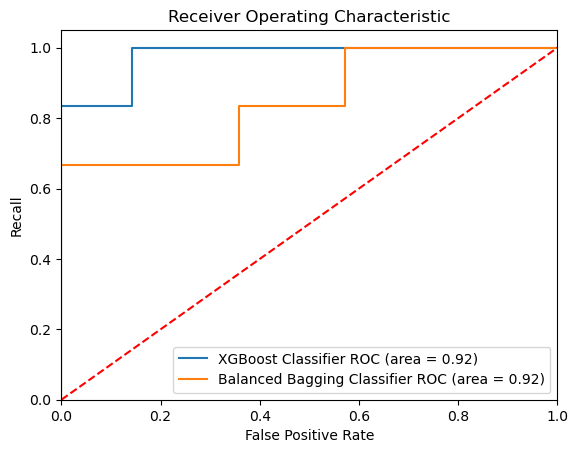

In [10]:
# PLotting ROC curve
auc_models = [
    {
        'label': 'XGBoost Classifier',
        'model': CustomXGBoost(),
        'auc': roc_auc_score(y_test, y_test_pred)
    },
    {
        'label': 'Balanced Bagging Classifier',
        'model': CustomImblearnBalancedBagging(estimator=estimator),
        'auc': roc_auc_score(y_test, y_test_pred)
    }
]

for m in auc_models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    auc = roc_auc_score(y_test, y_pred)

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], m['auc']))

# custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [11]:
#param_grids = {
    #'DecisionTree': {
        #'max_depth': [3, 5, 7, 10],
        #'min_samples_split': [2, 5, 10],
        #'criterion': ['gini', 'entropy']
    #},
    #'XGBoost': {
        #'learning_rate': [0.01, 0.1, 0.2],
        #'n_estimators': [50, 100, 200],
        #'max_depth': [3, 5, 10]
    #},
    #'LightGBM': {
        #'learning_rate': [0.01, 0.1, 0.2],
        #'n_estimators': [50, 100, 200],
        #'max_depth': [3, 5, 10]
    #},
    #'Bagging': {
        #'n_estimators': [10, 50, 100],
        #'max_samples': [0.5, 1.0],
        #'max_features': [0.5, 1.0]
    #},
    #'BalancedBagging': {
        #'n_estimators': [10, 50, 100],
        #'max_samples': [0.5, 1.0],
        #'max_features': [0.5, 1.0]
    #}
#}

# Hyparparameter tuning for random forest and xgboost for 'Recall' metric
param_grids = {
    'RandomForest': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10]
    }
}


In [ ]:
# For RandomForest
rf_model = CustomRandomForest(random_state=42)
rf_grid_search = GridSearchCV(rf_model, param_grids['RandomForest'], cv=5, scoring='auc', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# For XGBoost
xgb_model = CustomXGBoost(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid_search = GridSearchCV(xgb_model, param_grids['XGBoost'], cv=5, scoring='auc', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)


In [ ]:
# For RandomForest
print("Best parameters for RandomForest: ", rf_grid_search.best_params_)
print("Best recall score for RandomForest: ", rf_grid_search.best_score_)

# For XGBoost
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)
print("Best recall score for XGBoost: ", xgb_grid_search.best_score_)


In [13]:
# Shap values
import shap

def shap_viz(model, X_test, title, target):
    
    #Prepare the features you want to evaluate
    my_features= list(dataset.drop(columns=['Frailty_State', 'Frailty_Score'], axis=1).columns)
    my_features_idx = [list(dataset.drop(columns=['Frailty_State', 'Frailty_Score'], axis=1).columns).index(x) for x in my_features]

    
    #Define your metric
    class_names = ['Frail)', 'not_frail_:(']

    #Load the SHAP explainer, since Random Forest is a decision tree, I used TreeExplainer
    explainer = shap.TreeExplainer(model)
    #We train the SHAP values on the features based on the validation set
    shap_values = explainer.shap_values(X_test.values)


    plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    shap.summary_plot(shap_values, X_test.values, plot_type='bar', class_names=class_names, feature_names=X_test.columns, max_display=20, show=False, plot_size=None)
    plt.title(f'{title} – Weight of the impact of each feature')

    plt.subplot(1,2,2)
    #shap_values[n] evaluates the impact of features for predicting satisfaction
    #n = 0 -- not happy, n = 1 -- happy
    shap.summary_plot(shap_values[1], X_test.values, feature_names=col_names, max_display=20, show=False,  plot_size=None)
    plt.title(f'{title} – Directional impact of each feature')
    plt.tight_layout()

    #To save a picture of your SHAP viz
    plt.savefig(f'{title}.png', bbox_inches='tight', dpi=100)

    plt.show()
  

    #To print a list of the top 10 most impactful features
    vals = np.abs(shap_values[0]).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_test.columns, vals)), columns=['col_name', 'feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
    for i in list(feature_importance.col_name.head(10)):
            print(i)
    return shap_values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [7]:
feature_names = list(dataset.drop(columns=['Frailty_State'], axis=1).columns)

In [8]:
# Convert X_train and X_test back to DataFrames with the appropriate column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)
y_train_df = pd.DataFrame(y_train, columns=['Frailty_State'])
y_test_df = pd.DataFrame(y_test, columns=['Frailty_State'])

X_train_df.head()

,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006_S1_,FROPCOM0006_S2_,FROPCOM0006_S3_,FROPCOM0006_S4_,FROPCOM0006_S5_,...,romberg_EyesOpen_SwayDensity,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,MFESCALE_SCORE,Frailty_Score
0,1.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.84,29.84,0.000793,0.005900,99.0,93.0,43.030706,NaN,134.0,9.0
1,1.0,69.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,29.76,29.84,0.000851,0.003849,98.0,98.0,29.752066,0.0,133.0,5.0
2,0.0,67.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,29.80,29.88,0.000746,0.001174,99.0,99.0,23.437500,-2.0,103.0,8.0
3,0.0,67.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,29.88,29.88,0.000486,0.000944,99.0,99.0,28.068944,0.0,140.0,8.0
4,0.0,78.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,29.88,29.88,0.002203,0.003915,93.0,88.0,25.217359,4.0,140.0,8.0


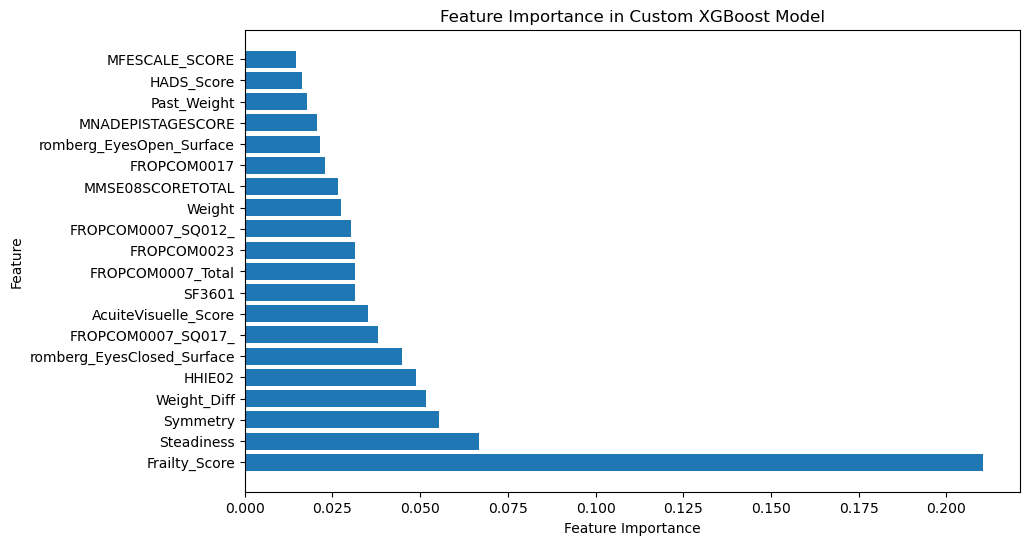

In [9]:
model = CustomXGBoost()
model.fit(X_train_df, y_train_df)
model.plot_feature_importances(X_train_df.columns)